# 1. Conjugate Gradient Method to solve a quadratic function

Q. Consider the quadratic function 
$f(x_1,x_2,x_3) = \frac{3}{2}x_1^2+2x_2^2+\frac{3}{2}x_3^2+x_1x_3+2x_2x_3-3x_1-x_3$
We find the minimizer using the conjugate gradient algorithm, using the starting point $x^{(0)}=[0,0,0].$\
We can represent f as \
\begin{align}  
 f(x) = \frac{1}{2}x^TQx -x^Tb
\end{align}
where 
\begin{align}  
Q =\begin{pmatrix}
3 & 0 & 1 \\
0 & 4 & 2 \\
1 & 2& 3
\end{pmatrix}
\end{align}
\begin{align}  
b = \begin{pmatrix}
3 \\
0 \\
1 
\end{pmatrix}
\end{align}


In [111]:
import numpy as np
# function to return the gradient of the quadratic function
def g_f(x):

  return np.array([3*x[0]+x[2]-3,4*x[1]+2*x[2], x[0]+2*x[1]+3*x[2]-1])

In [112]:
# The function conjugate gradient : for finding the minimum value for quadratic function.
def conjugate_gradient(x,Q,eps):

  i = 0
  lst_x = []
  lst_g = []
  sum_g = [] 
  g = g_f(x) # getting the gradient
  lst_x.append(x) 
  lst_g.append(g)
  sum_g.append(abs(np.sum(g)))
  
  d = -g # specifying the direction of descent
  
  while abs(np.sum(g)) > eps: # specifing exit instance from the executing of the loop
    
    i +=1 # specifying a counter to keep a count on the number of executions.

    alpha = - np.divide(np.dot(g,d),np.dot(d,np.dot(Q,d))) # calculating the step size.
    x = x + alpha*d #calculating the next value of x
    lst_x.append(x) 

    g = g_f(x) 
    lst_g.append(g) 
    beta = np.divide(np.dot(g,np.dot(Q,d)),np.dot(d,np.dot(Q,d))) # calculating beta, to calculate the Q-conjugate descent direction
    d = -g + beta*d 
    sum_g.append(abs(np.sum(g)))


  return x,lst_x,lst_g,i,sum_g

In [113]:
# Initializing values of x, Q and function call 

x = np.array([0,0,0])
Q = np.array([[3,0,1],[0,4,2],[1,2,3]])
x,lst,lst_g,i,sum_g = conjugate_gradient(x,Q,eps=1e-4)

In [114]:
# Presenting the iterations in readable format.
import pandas as pd
lst = np.array(lst)
lst_g = np.array(lst_g)
g = lst_g.reshape(i+1,len(x))
x = lst.reshape(i+1,len(x))
df = np.concatenate((x,g),axis=1)
df = pd.DataFrame(df,columns=['x1','x2','x3','g1','g2','g3'])
df

,x1,x2,x3,g1,g2,g3
0,0.000000,0.000000e+00,0.000000e+00,-3.000000e+00,0.000000e+00,-1.000000e+00
1,0.833333,0.000000e+00,2.777778e-01,-2.222222e-01,5.555556e-01,6.666667e-01
2,0.934579,-1.214953e-01,1.495327e-01,-4.672897e-02,-1.869159e-01,1.401869e-01
3,1.000000,-1.110223e-16,2.775558e-17,-4.440892e-16,-3.885781e-16,-2.220446e-16


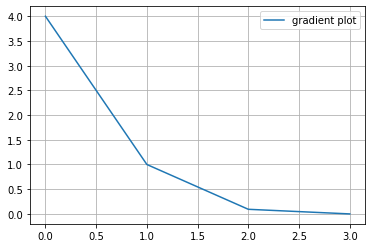

In [115]:
# The decreasing gradient values of the function.
import matplotlib.pyplot as plt
X = range(i+1)
Y = sum_g
plt.plot(X,Y)
plt.legend(['gradient plot'])
plt.grid()
plt.show()

# 2. Conjugate gradient for non-quadratic functions.

Unfortunately, we do not know the value of $Q$ that best approximates $f$ around $x^{(k)}$. Instead several choices of $\beta^{(k)}$ tend to work well:


\begin{align}  
Fletcher - Reeves : \beta^{(k)} = \frac{g^{(k)T}g^{(k)}}{g^{(k-1)T}g^{(k-1)}}
\end{align}

\begin{align}  
Polak-Ribiere : \beta^{(k)} = \frac{g^{(k)T}(g^{(k)}-g^{(k-1)})}{g^{(k-1)T}g^{(k-1)}}
\end{align}

Convergence for the Polak Ribiere Method can be guranteed if we  modify it to allow for automatic resets. 
$ \beta \leftarrow  max(\beta,0)$

In [116]:
# Defining the exact line search method , to calculate alpha for every stage.

def f(alpha,x,d):
  
  return (1-(x[0]-alpha*d[0]))**2 + 100*((x[1]-alpha*d[1])-(x[0]-alpha*d[0])**2)**2
 
# derivative of the objective function 

def grad_alpha(f,alpha,x,d):
  h = 0.00001
  return (f(alpha+h,x,d)-f(alpha,x,d))/h

def bracket_minimum(alpha,x,d,s,k):

  a, fa = alpha,  f(alpha,x,d)
  b, fb = a+s , f(a+s,x,d)

  if fb > fa:
    a,b = b,a 
    fa, fb = fb,fb
    s = -s

  while True:
    c, fc = b+s, f(b+s,x,d)
    if fc > fb:
      if a < c:
        return [a,c]
      else:
        return [c,a]
    a,fa,b,fb = b,fb,c,fc
    s*=k

def bisection_root_finding(a,b,x,d,eps):

  if a > b : 
    a,b = b,a 
  fa, fb = grad_alpha(f,a,x,d), grad_alpha(f,b,x,d)
  if fa == 0:
    b = a
    return (a)

  if fb == 0:
    a = b
    return (b)
  iter = 0
 
  while abs(b - a) > eps:
    iter +=1
    c = (a+b)/2
    y = grad_alpha(f,c,x,d)

    if y == 0:
      a,b = c, c
      break

    if np.sign(y)  < 0  :
      a = c
    else:
      b = c

  return (a+b)/2

def line_search(alpha,x,d):
  
  a,b = bracket_minimum(alpha,x,d,s=0.01,k=2.0)
  alpha = bisection_root_finding(a,b,x,d,eps=1e-5)
  return alpha

In [117]:
# We will use the conjugate gradient method to arrive at the minimum of the Rosenbrock's Banana Function
def fun(x,a):
  pow = a
  if pow == 0:
    return (1 - x[0])**2 + 100*(x[1] - x[0]**2)**2
   
  else:
    h = 0.00001
    x1 = np.array([x[0]+h,x[1]])
    x2 = np.array([x[0],x[1]+h])
    # The gradient Vector
    g = np.array([(fun(x1,0)-fun(x,0))/h,(fun(x2,0)-fun(x,0))/h])
    return g

In [118]:
# The function conjugate gradient : for finding the minimum value for quadratic function.
def conjugate_gradient_nonquad(x,alpha,eps):

  # Initialize counter and empty lists to hold x and function values
  i = 0
  lst_x = []
  lst_f = []

  # assigning the function and gradient value.
  f, g = fun(x,0), fun(x,1) 
  
  lst_x.append(x) 
  lst_f.append(f)

  # specifying the direction of descent
  d = np.array(g/np.linalg.norm(g))
  
  # specifing exit instance from the executing of the loop
  while abs(f) > eps: 
    
    #specifying a counter to keep a count on the number of executions.
    i +=1 

    # replace the calculating on alpha with exact line search, similar to our other first - order descent methods
    alpha = line_search(alpha,x,d)
   
    #calculating the next value of x
    x = x - alpha*d 
    f = fun(x,0)
    g1= fun(x,1) 
    
    # This is the step, which differentiates from the above conjugate gradient method.
    beta = np.divide(np.dot(g1.T,g1-g),np.dot(g.T,g) )# calculating beta, using the Polak Ribiere formula 
    beta = max(0,beta)  # to assure convergence, we add this step

    # updating the direction vector
    d1 = np.array(g1/np.linalg.norm(g1))
    d = d1 + beta*d  
    g = g1

    # appending values to our lists.
    lst_x.append(x)
    lst_f.append(f) 

  print("Number of iterations",i)
  print("The value of the Rosenbrock banana function at its minimum:",fun(x,0))
  return x,lst_x,lst_f,i

In [119]:
# Initializing values of x, Q and function call 

x = np.array([1,2])
alpha = 0.1
x,lst,lst_f,i = conjugate_gradient_nonquad(x,alpha,eps=1e-4)
print("The minimum point co-ordinates of the Rosenbrock function:",x)

Number of iterations 17
The value of the Rosenbrock banana function at its minimum: 1.6621078990511596e-05
The minimum point co-ordinates of the Rosenbrock function: [1.0040663  1.00817851]


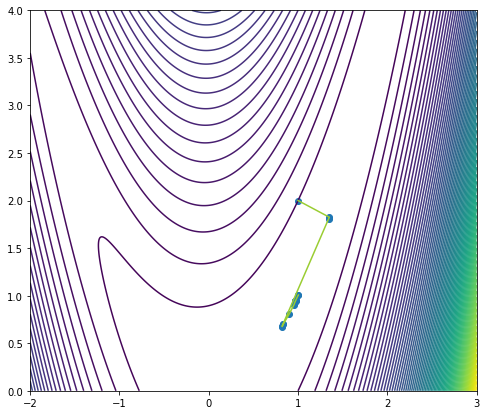

In [124]:
# Plot of the successive points of 'x' as we progress in the direction of the steepest descent.

x1 = np.linspace(-2,3,500)
x2 = np.linspace(0,4,500)
arr = pd.DataFrame(lst)
# Creating 2-D grid of features
[X, Y] = np.meshgrid(x1,x2)
Z = (1 - X)**2 + 5*(Y - X**2)**2

a,b  = arr[0],arr[1]
plt.figure(figsize=(8,7))
plt.scatter(a,b)
plt.contour(X,Y,Z,90)
#plt.plot(a,b,color='#bcbd22')
plt.plot(a,b,color='yellowgreen')
plt.show()